In [1]:
import pandas as pd
import yfinance as yf

In [3]:
data = yf.download('AAPL', start='2013-10-01', end='2023-09-30')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,17.087500,17.469286,17.084999,17.427143,15.170194,353883600
2013-10-02,17.343929,17.564285,17.276787,17.484285,15.219936,289184000
2013-10-03,17.518213,17.583929,17.169287,17.264643,15.028730,322753200
2013-10-04,17.280714,17.307142,17.092857,17.251072,15.016918,258868400
2013-10-07,17.377144,17.594643,17.333929,17.419643,15.163658,312292400
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,175.624237,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.514893,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,169.988846,66921800


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,73.695689,74.509822,72.924325,73.748615,71.664741,1.432806e+08
std,54.220917,54.867696,53.610429,54.260830,54.630355,8.876120e+07
min,17.087500,17.307142,17.081429,17.176430,14.951940,3.145820e+07
25%,28.997499,29.205000,28.730000,28.955000,26.368538,8.418310e+07
50%,46.450001,46.832500,46.145000,46.465000,44.368813,1.159644e+08
75%,128.949997,130.600006,127.410004,129.610001,127.486732,1.771516e+08
max,196.240005,198.229996,195.279999,196.449997,195.677261,1.065523e+09


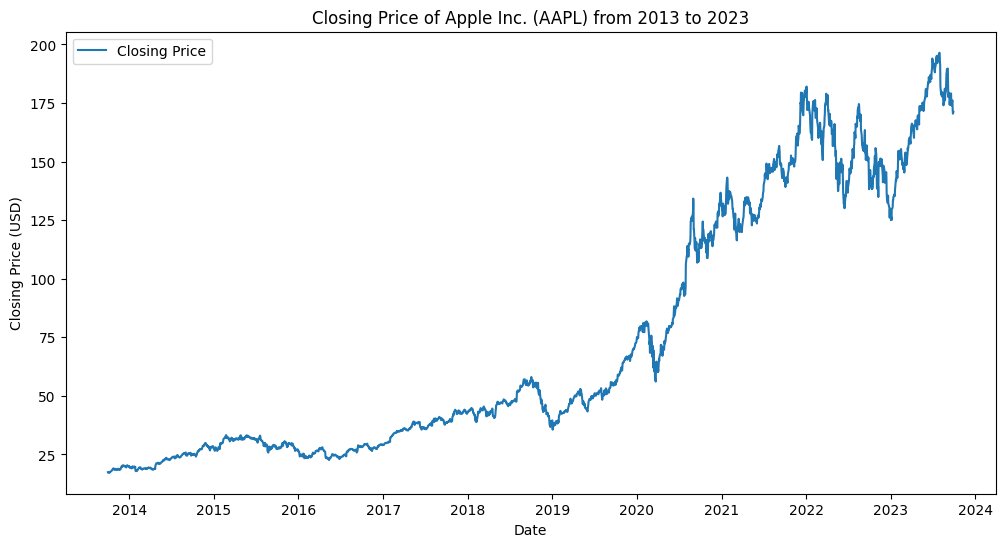

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting closing price
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.title('Closing Price of Apple Inc. (AAPL) from 2013 to 2023')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

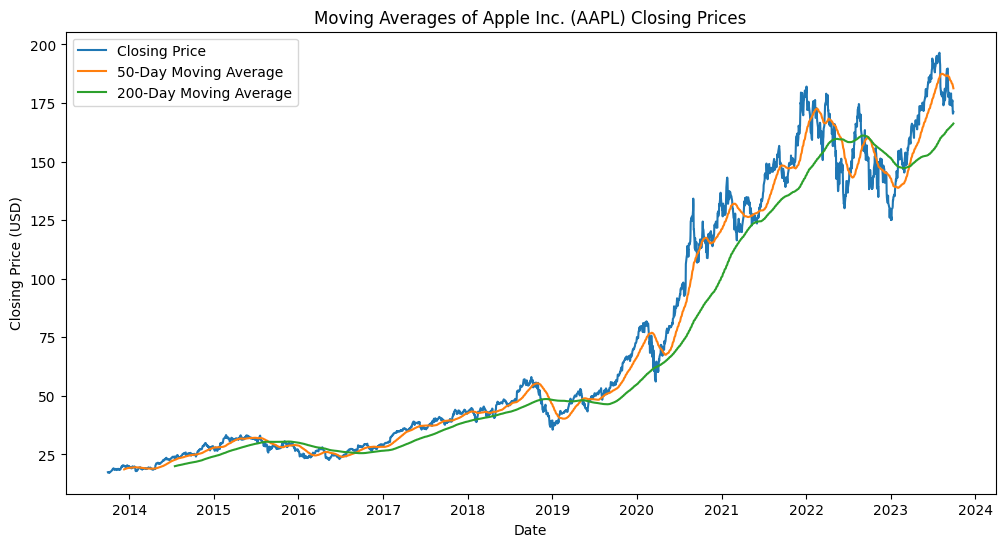

In [6]:
# Calculating moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plotting moving averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.plot(data.index, data['MA50'], label='50-Day Moving Average')
plt.plot(data.index, data['MA200'], label='200-Day Moving Average')
plt.title('Moving Averages of Apple Inc. (AAPL) Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [7]:
pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 KB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


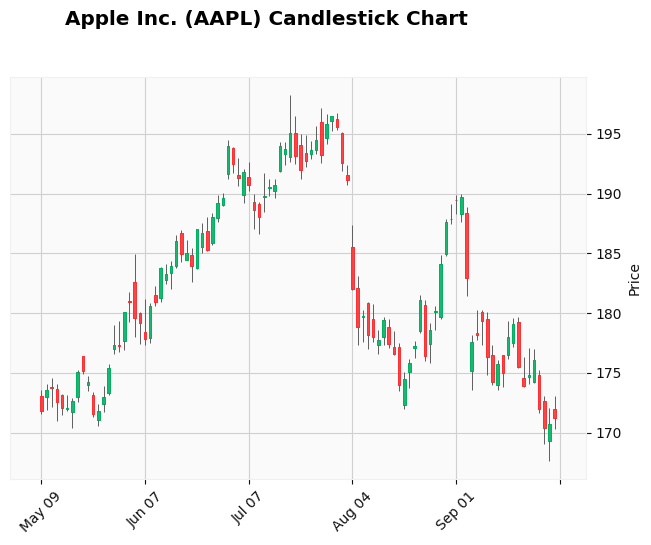

In [12]:
import mplfinance as mpf

# Plotting candlestick chart
mpf.plot(data[-100:], type='candle', title='Apple Inc. (AAPL) Candlestick Chart', style='yahoo')

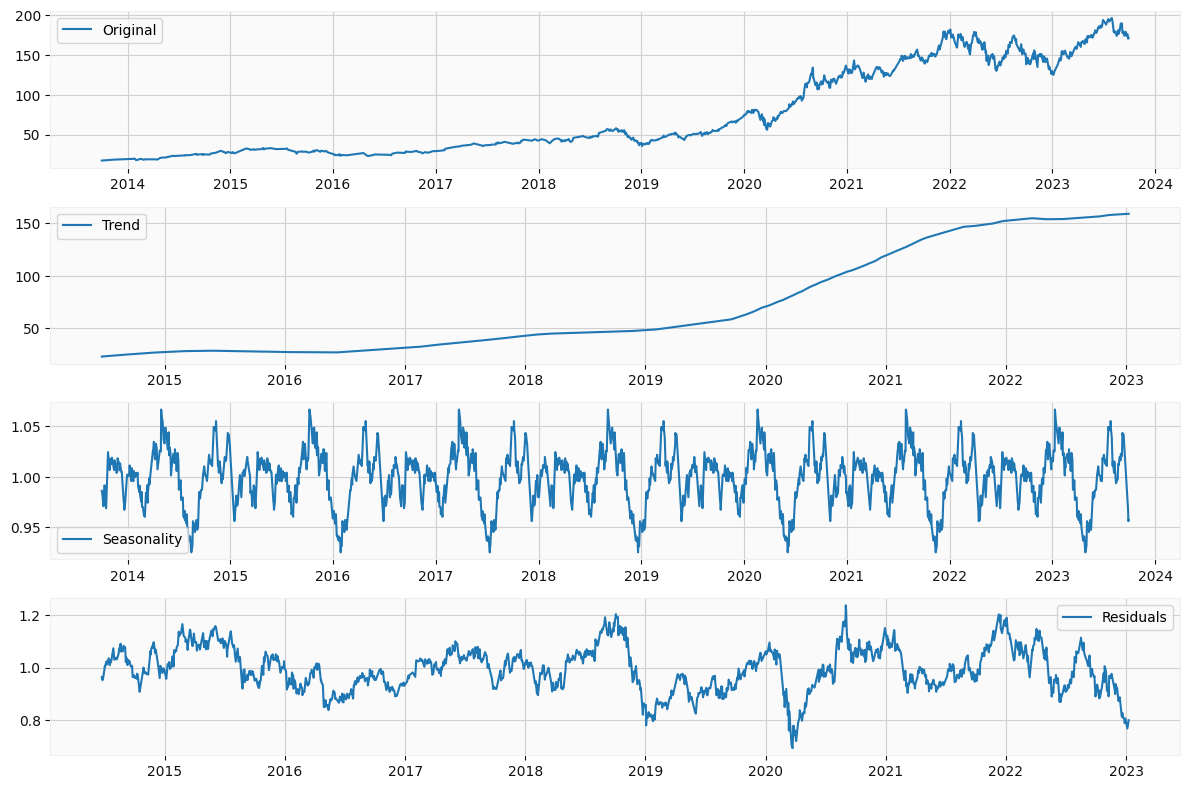

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

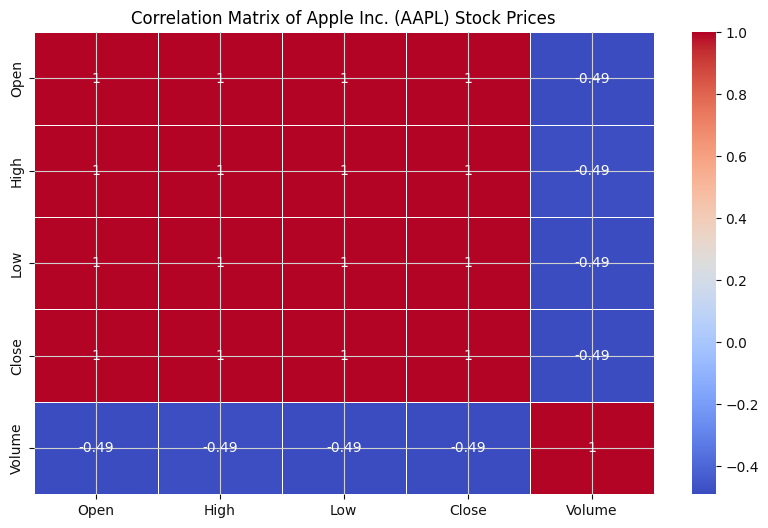

In [14]:
import seaborn as sns

# Correlation matrix
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Apple Inc. (AAPL) Stock Prices')
plt.show()